In [1]:
import tensorflow as tf
import numpy as np

https://www.tensorflow.org/guide/tensor

Tensors are multi-dimensional arrays with a **uniform type (called a dtype)**. You can see all supported dtypes at `tf.dtypes.DType` (https://www.tensorflow.org/api_docs/python/tf/dtypes/DType).

**All tensors are immutable** like Python numbers and strings: you **can never update the contents of a tensor**, only create a new one.

In [3]:
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

rank_3_tensor.numpy()

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

### Basic math on tensors

In [10]:
a = tf.constant([[1, 2],
                 [3, 4]], dtype=tf.float32)
b = tf.constant([[1, 1],
                 [1, 1]], dtype=tf.float32) # Could have also said `tf.ones([2,2])`

In [11]:
print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

# print(a + b, "\n") # element-wise addition
# print(a * b, "\n") # element-wise multiplication
# print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2. 3.]
 [4. 5.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[3. 3.]
 [7. 7.]], shape=(2, 2), dtype=float32) 



In [19]:

# BROADCASTING
#In this case a 3x1 matrix is element-wise multiplied by a 1x4 matrix to produce a 3x4 matrix. 
#Note how the leading 1 is optional: The shape of y is [4].

# These are the same computations
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [20]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


In [21]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


In [9]:
# Find the largest value
print(tf.reduce_max(a))
# Find the index of the largest value
print(tf.argmax(a))
# Compute the softmax
print(tf.nn.softmax(a))

tf.Tensor(4.0, shape=(), dtype=float32)
tf.Tensor([1 1], shape=(2,), dtype=int64)
tf.Tensor(
[[0.26894143 0.73105854]
 [0.26894143 0.73105854]], shape=(2, 2), dtype=float32)


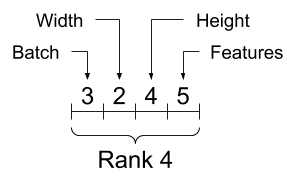

In [14]:
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


You can reshape a tensor into a new shape. The tf.reshape operation is fast and cheap as the underlying data does not need to be duplicated.

In [15]:
# You can reshape a tensor to a new shape.
# Note that you're passing in a list
reshaped = tf.reshape(x, [1, 3])

print(x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


The data maintains its layout in memory and a new tensor is created, with the requested shape, pointing to the same data. TensorFlow uses C-style "row-major" memory ordering, where incrementing the rightmost index corresponds to a single step in memory.

If you **flatten a tensor** you can see what order it is laid out in memory.

In [16]:
# A `-1` passed in the `shape` argument says "Whatever fits".
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


In [17]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


### `tf.gather`

https://www.tensorflow.org/api_docs/python/tf/gather

In [4]:
params = tf.constant(['p0', 'p1', 'p2', 'p3', 'p4', 'p5'])
print(params[3].numpy())

tf.gather(params, 3).numpy()

b'p3'


b'p3'

In [5]:
indices = [2, 0, 2, 5]
tf.gather(params, indices).numpy()

array([b'p2', b'p0', b'p2', b'p5'], dtype=object)

In [6]:
tf.gather(params, [[2, 0], [2, 5]]).numpy()

array([[b'p2', b'p0'],
       [b'p2', b'p5']], dtype=object)

In [7]:
params = tf.constant([[0, 1.0, 2.0],
                      [10.0, 11.0, 12.0],
                      [20.0, 21.0, 22.0],
                      [30.0, 31.0, 32.0]])

tf.gather(params, indices=[3,1]).numpy()

array([[30., 31., 32.],
       [10., 11., 12.]], dtype=float32)

In [8]:
tf.gather(params, indices=[2,1], axis=1).numpy()

array([[ 2.,  1.],
       [12., 11.],
       [22., 21.],
       [32., 31.]], dtype=float32)

### `tf.cond`

### `tf.while_loop`

###  `tf.TensorArray`

for list constructs

In [22]:
ta = tf.TensorArray(tf.float32, size=0, dynamic_size=True, clear_after_read=False)
ta = ta.write(0, 10)
ta = ta.write(1, 20)
ta = ta.write(2, 30)

In [23]:
ta.read(0), ta.read(1), ta.read(2)

(<tf.Tensor: shape=(), dtype=float32, numpy=10.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=20.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>)

In [24]:
ta.stack()

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([10., 20., 30.], dtype=float32)>

In [29]:
ta = tf.TensorArray(tf.float32, size=0, dynamic_size=True, clear_after_read=False)

In [30]:
ta = ta.unstack([0., 1.])

In [31]:
ta.read(0), ta.read(1)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [32]:
for i in range(2, 8):
    ta = ta.write(i, ta.read(i - 1) + ta.read(i - 2))

In [33]:
ta.stack()

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 0.,  1.,  1.,  2.,  3.,  5.,  8., 13.], dtype=float32)>

In [36]:
v = tf.Variable(1)
@tf.function
def f(x):
    tf.print(type(x))
    ta = tf.TensorArray(tf.int32, size=0, dynamic_size=True)
    for i in tf.range(x):
        v.assign_add(i)
        ta = ta.write(i, v)
    return ta.stack()

f(5)

<class 'int'>


<tf.Tensor: shape=(5,), dtype=int32, numpy=array([ 1,  2,  4,  7, 11])>

### `tf.data.Iterator` 
for iteration constructs

### Just like how TensorFlow has a specialized tf.TensorArray for list constructs, it has a specialized tf.data.Iterator for iteration constructs. See the section on AutoGraph transformations for an overview. Also, the tf.data API can help implement generator patterns:

https://www.tensorflow.org/guide/function#using_python_iterators_and_generators

In [ ]:
@tf.function
def good_consume_next(iterator):
  # This is ok, iterator is a tf.data.Iterator
  tf.print("Value:", next(iterator))

ds = tf.data.Dataset.from_tensor_slices([1, 2, 3])
iterator = iter(ds)
good_consume_next(iterator)
good_consume_next(iterator)
good_consume_next(iterator)

### `tf.range`

In [ ]:
batch_size = 2
seq_len = 3
feature_size = 4

def rnn_step(inp, state):
  return inp + state

@tf.function
def dynamic_rnn(rnn_step, input_data, initial_state):
  # [batch, time, features] -> [time, batch, features]
  input_data = tf.transpose(input_data, [1, 0, 2])
  max_seq_len = input_data.shape[0]

  states = tf.TensorArray(tf.float32, size=max_seq_len)
  state = initial_state
  for i in tf.range(max_seq_len):
    state = rnn_step(input_data[i], state)
    states = states.write(i, state)
  return tf.transpose(states.stack(), [1, 0, 2])

dynamic_rnn(rnn_step,
            tf.random.uniform([batch_size, seq_len, feature_size]),
            tf.zeros([batch_size, feature_size]))

### `tf.cast`

In [18]:
the_f64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
# Now, cast to an uint8 and lose the decimal precision
the_u8_tensor = tf.cast(the_f16_tensor, dtype=tf.uint8)
print(the_u8_tensor)

tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


### `tf.convert_to_tensor`

https://www.tensorflow.org/guide/tensor#tfconvert_to_tensor

https://www.tensorflow.org/api_docs/python/tf/register_tensor_conversion_function


The base tf.Tensor class requires tensors to be "rectangular"---that is, along each axis, every element is the same size. However, there are specialized types of tensors that can handle different shapes:

- Ragged tensors (see RaggedTensor below https://www.tensorflow.org/guide/tensor#ragged_tensors)
- Sparse tensors (see SparseTensor below)

In [22]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


In [23]:
print(ragged_tensor.shape)

(4, None)


### Strings

https://www.tensorflow.org/guide/tensor#string_tensors

Unicode

https://www.tensorflow.org/text/guide/unicode

In [24]:
# If you have three string tensors of different lengths, this is OK.
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
# Note that the shape is (3,). The string length is not included.
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


### Sparse tensors

In [25]:
# Sparse tensors store values by index in a memory-efficient manner
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, "\n")

# You can convert sparse tensors to dense
print(tf.sparse.to_dense(sparse_tensor))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)


## Variable

https://www.tensorflow.org/guide/variable

Variables are created and tracked via the tf.Variable class. A tf.Variable represents a tensor whose value can be changed by running ops on it. Specific ops allow you to read and modify the values of this tensor. Higher level libraries like tf.keras use tf.Variable to store model parameters.

In [26]:
# Uncomment to see where your variables get placed (see below)
tf.debugging.set_log_device_placement(True)

In [27]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)

# Variables can be all kinds of types, just like tensors
bool_variable = tf.Variable([False, False, False, True])
complex_variable = tf.Variable([5 + 4j, 6 + 1j])

In [28]:
print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

Shape:  (2, 2)
DType:  <dtype: 'float32'>
As NumPy:  [[1. 2.]
 [3. 4.]]


### variables cannot be reshaped. Instead a new tensor is created!

In [29]:
print("A variable:", my_variable)
print("\nViewed as a tensor:", tf.convert_to_tensor(my_variable))
print("\nIndex of highest value:", tf.argmax(my_variable))

# This creates a new tensor; it does not reshape the variable.
print("\nCopying and reshaping: ", tf.reshape(my_variable, [1,4]))

A variable: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

Viewed as a tensor: tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)

Index of highest value: tf.Tensor([1 1], shape=(2,), dtype=int64)

Copying and reshaping:  tf.Tensor([[1. 2. 3. 4.]], shape=(1, 4), dtype=float32)


As noted above, variables are backed by tensors. You can reassign the tensor using `tf.Variable.assign`. Calling assign does not (usually) allocate a new tensor; instead, the existing tensor's memory is reused.

In [30]:
a = tf.Variable([2.0, 3.0])
# This will keep the same dtype, float32
a.assign([1, 2]) 
# Not allowed as it resizes the variable: 
try:
    a.assign([1.0, 2.0, 3.0])
except Exception as e:
    print(f"{type(e).__name__}: {e}")

ValueError: Cannot assign to variable Variable:0 due to variable shape (2,) and value shape (3,) are incompatible


**If you use a variable like a tensor in operations, you will usually operate on the backing tensor.**

**Creating new variables from existing variables duplicates the backing tensors. Two variables will not share the same memory.**

In [31]:
a = tf.Variable([2.0, 3.0])
# Create b based on the value of a
b = tf.Variable(a)
a.assign([5, 6])

# a and b are different
print(a.numpy())
print(b.numpy())

# There are other versions of assign
print(a.assign_add([2,3]).numpy())  # [7. 9.]
print(a.assign_sub([7,9]).numpy())  # [0. 0.]~

[5. 6.]
[2. 3.]
[7. 9.]
[0. 0.]


Variables can also be named which can help you track and debug them. You can give two variables the same name.

In [32]:
# Create a and b; they will have the same name but will be backed by
# different tensors.
a = tf.Variable(my_tensor, name="Mark")
# A new variable with the same name, but different value
# Note that the scalar add is broadcast
b = tf.Variable(my_tensor + 1, name="Mark")

# These are elementwise-unequal, despite having the same name
print(a == b)

tf.Tensor(
[[False False]
 [False False]], shape=(2, 2), dtype=bool)


In [33]:
#An example of a variable that would not need gradients is a training step counter

step_counter = tf.Variable(1, trainable=False)

### Place Variables on CPU or GPU

In [34]:
with tf.device('CPU:0'):

    # Create some tensors
    a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


It's possible to set the location of a variable or tensor on one device and do the computation on another device. This will introduce delay, as data needs to be copied between the devices.

You might do this, however, if you had multiple GPU workers but only want one copy of the variables.

In [35]:
with tf.device('CPU:0'):
    a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.Variable([[1.0, 2.0, 3.0]])

with tf.device('GPU:0'):
    # Element-wise multiply
    k = a * b

print(k)

tf.Tensor(
[[ 1.  4.  9.]
 [ 4. 10. 18.]], shape=(2, 3), dtype=float32)
